## Aula 2: Explorando dataframa e medidas de tendência central

##  Parte 1 — Explorando DataFrames (CSV) + Estatística Descritiva**

**Objetivos da aula**  
- Ler um arquivo **CSV** com `pandas` e entender a estrutura de um **DataFrame**.  
- Usar métodos básicos de inspeção: `.head()`, `.tail()`, `.info()`, `.shape`, `.dtypes`, `.describe()`.  
- Explorar **tipos de variáveis** (numéricas, categóricas) e **valores ausentes**.  
- Fazer **estatística descritiva** simples (médias, proporções, tabelas cruzadas).  
- Produzir **gráficos básicos** de frequências e médias por grupo.



# O que é um arquivo CSV?

CSV significa **Comma-Separated Values** (valores separados por vírgula). É um formato **de texto simples** em que:
- cada **linha** é um registro (uma observação);
- cada **coluna** é uma variável;
- os valores em cada linha são separados por **vírgula** (ou, às vezes, ponto e vírgula).

Exemplo de três registros com quatro variáveis:

```
id,sexo,idade,renda
1,feminino,23,1500
2,masculino,45,2800
3,feminino,60,2200
```

Por que usamos CSV?
- É **amplamente compatível** (abre no Excel, Google Sheets, R, Python, Stata, SPSS etc.).
- É **leve** e simples para compartilhar.
- Facilita a **importação** e **exportação** entre ferramentas.



## 0) Preparação do ambiente
Se você estiver no **Google Colab**, rode a célula abaixo para instalar/atualizar pacotes (opcional).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.precision', 2)


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (



## 1) Obtendo um CSV para trabalhar
Para esta aula, usaremos um **CSV sintético de pesquisa** com 300 linhas, já incluído aqui como `pesquisa_exemplo.csv`.

Se estiver no Colab, você pode **enviar** um CSV seu (`Upload`) ou usar este arquivo de exemplo.


In [3]:
df = pd.read_csv("pesquisa_exemplo.csv")

df.head()

,id,sexo,fx_etaria,escolaridade,uf,renda,satisfacao_vida,voto2,uso_redes_diario,apoia_proib_arma
0,1,feminino,16-24,fundamental,CE,1612,3,outros,1,1
1,2,masculino,35-44,fundamental,BA,1882,6,branco/nulo/não sabe,0,0
2,3,masculino,35-44,fundamental,MG,2241,7,PT,1,0
3,4,masculino,35-44,fundamental,MG,1831,4,PT,1,0
4,5,feminino,45-59,fundamental,RS,1835,10,branco/nulo/não sabe,1,0



## 2) Inspeção rápida do DataFrame
Ferramentas úteis para conhecer o conjunto de dados:
- `df.shape` (linhas, colunas)  
- `df.columns` (nomes das variáveis)  
- `df.head()` / `df.tail()` (amostras)  
- `df.info()` (tipos das colunas e contagem de não nulos)  
- `df.describe()` (estatísticas numéricas) e `df.describe(include='object')` (categóricas).


In [4]:

df.shape, df.columns.tolist()


((300, 10),
 ['id',
  'sexo',
  'fx_etaria',
  'escolaridade',
  'uf',
  'renda',
  'satisfacao_vida',
  'voto2',
  'uso_redes_diario',
  'apoia_proib_arma'])

In [5]:

df.tail(3)


,id,sexo,fx_etaria,escolaridade,uf,renda,satisfacao_vida,voto2,uso_redes_diario,apoia_proib_arma
297,298,feminino,16-24,superior,BA,5504,5,outros,1,1
298,299,masculino,25-34,fundamental,RJ,826,9,branco/nulo/não sabe,0,1
299,300,feminino,16-24,fundamental,DF,1414,6,PT,1,1


In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                300 non-null    int64 
 1   sexo              300 non-null    object
 2   fx_etaria         300 non-null    object
 3   escolaridade      300 non-null    object
 4   uf                300 non-null    object
 5   renda             300 non-null    int64 
 6   satisfacao_vida   300 non-null    int64 
 7   voto2             300 non-null    object
 8   uso_redes_diario  300 non-null    int64 
 9   apoia_proib_arma  300 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 23.6+ KB


In [7]:

df.describe()


,id,renda,satisfacao_vida,uso_redes_diario,apoia_proib_arma
count,300.00,300.00,300.00,300.00,300.00
mean,150.50,2911.55,5.85,0.67,0.51
std,86.75,1519.71,2.01,0.47,0.50
min,1.00,600.00,0.00,0.00,0.00
25%,75.75,1711.75,5.00,0.00,0.00
50%,150.50,2593.00,6.00,1.00,1.00
75%,225.25,3896.25,7.00,1.00,1.00
max,300.00,7714.00,10.00,1.00,1.00


In [8]:

df.describe(include='object')


,sexo,fx_etaria,escolaridade,uf,voto2
count,300,300,300,300,300
unique,2,5,3,10,4
top,feminino,35-44,médio,PR,PT
freq,161,68,121,36,122



## 3) Tipos de variáveis e `dtypes`
Em pesquisas, é comum termos:
- **Categóricas** (ex.: `sexo`, `escolaridade`, `voto2`, `uf`)  
- **Numéricas** (ex.: `renda`, `satisfacao_vida`).

Podemos converter algumas em **`category`** para economizar memória e facilitar análises.


In [15]:
df["sexo"] = df["sexo"].astype("category")
df["fx_etaria"] = df["fx_etaria"].astype("category")
df["escolaridade"] = df["escolaridade"].astype("category")
df["uf"] = df["uf"].astype("category")
df["voto2"] = df["voto2"].astype("category")                                   

df.dtypes

id                     int64
sexo                category
fx_etaria           category
escolaridade        category
uf                  category
renda                  int64
satisfacao_vida        int64
voto2               category
uso_redes_diario       int64
apoia_proib_arma       int64
dtype: object

 Caminho mais simples

In [16]:
# Para um conjunto de variáveis: de objeto para categoria 

cat_cols = ["sexo", "fx_etaria", "escolaridade", "uf", "voto2"]


df[cat_cols] = df[cat_cols].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                300 non-null    int64   
 1   sexo              300 non-null    category
 2   fx_etaria         300 non-null    category
 3   escolaridade      300 non-null    category
 4   uf                300 non-null    category
 5   renda             300 non-null    int64   
 6   satisfacao_vida   300 non-null    int64   
 7   voto2             300 non-null    category
 8   uso_redes_diario  300 non-null    int64   
 9   apoia_proib_arma  300 non-null    int64   
dtypes: category(5), int64(5)
memory usage: 14.3 KB



## 4) Valores ausentes (NA)
Verificando valores ausentes por coluna:


In [17]:
df.isna().sum()

id                  0
sexo                0
fx_etaria           0
escolaridade        0
uf                  0
renda               0
satisfacao_vida     0
voto2               0
uso_redes_diario    0
apoia_proib_arma    0
dtype: int64


---
## Onde conseguir **bases públicas** em CSV
- **IBGE** (Censo, PNAD Contínua, POF): muitos arquivos em CSV ou microdados (requer mais preparo).  
- **IPEA Data (Ipeadata)**: séries históricas econômicas e sociais.  
- **TSE** (Tribunal Superior Eleitoral): resultados de eleições por seção/município, em CSV.  
- **DataSUS**: saúde pública (internações, mortalidade, etc.), boa parte disponível em CSV.  
- **Portal Brasileiro de Dados Abertos** (dados.gov.br): agregador de bases públicas.  
- **Repositórios de pesquisas acadêmicas** (ex.: ESEB, LAPOP) — geralmente em formatos como CSV, DTA, SAV.

> Para esta disciplina, prefira conjuntos **pequenos** (até algumas centenas de milhares de linhas) e **documentados**.



# Parte 2 — Medidas de tendência central (conceitos + prática)

Nesta seção exploraremos as **Medidas de Tendência Central** (média, mediana e moda), 
e acrescentamos **como calcular em Python** com o nosso DataFrame.

**Ideias principais**  
- **Média**: soma os valores e divide pelo número de observações. É **sensível a valores extremos** (*outliers*).  
- **Mediana**: valor central dos dados **ordenados**; pouco afetada por valores extremos.  
- **Moda**: valor que **mais se repete** (pode haver mais de uma).  
- Quando a distribuição é **assimétrica** (cauda longa), a **mediana** costuma **representar melhor** o “centro”.  
- Em distribuições **simétricas**, média e mediana tendem a ser próximas.

> Vamos usar também **quartis** (Q1, Q2/mediana, Q3) e **percentis** para entender posições relativas na distribuição.



## 2.1 Conceitos rápidos 
- **Mediana**: ordene os dados; se **n** é ímpar, a mediana é o valor central; se **n** é par, é a **média dos dois valores centrais**.  
- **Média**: some tudo e divida por **n**.  
- **Sensibilidade a outliers**: ao **acrescentar um valor extremo**, a **média** pode mudar bastante, enquanto a **mediana** muda pouco.  
- **Quartis e percentis**: dividem os dados ordenados em **partes** (Q1 = 25%, Q2 = 50%, Q3 = 75%). Os **percentis** dividem em 100 partes (p5, p10, p90, p95...).  
- **Resumo de seis números**: mínimo, Q1, mediana (Q2), média, Q3, máximo.

> Exemplos conceituais como os que aparecem na apostila ajudam a visualizar a diferença entre **média** e **mediana** quando existe um **valor extremo**.



## 2.2 Média, mediana e moda (ex.: `renda` e `satisfacao_vida`)


In [18]:
# Média, mediana e moda de 'renda' e 'satisfacao_vida'
media_renda = df['renda'].mean()
mediana_renda = df['renda'].median()
moda_renda = df['renda'].mode()  # pode ter mais de uma moda

print("RENDA -> média:", round(media_renda, 2), 
      "| mediana:", round(mediana_renda, 2), 
      "| moda(s):", moda_renda.values[:5])  # mostra até 5 valores

RENDA -> média: 2911.55 | mediana: 2593.0 | moda(s): [600]


In [19]:
media_sat = df['satisfacao_vida'].mean()
mediana_sat = df['satisfacao_vida'].median()
moda_sat = df['satisfacao_vida'].mode()

print("SATISFAÇÃO -> média:", round(media_sat, 2), 
      "| mediana:", round(mediana_sat, 2), 
      "| moda(s):", moda_sat.values[:5])

SATISFAÇÃO -> média: 5.85 | mediana: 6.0 | moda(s): [5]



## 2.3 Média x Mediana com **outlier**

primeiro sem valor extremo, depois **adicionando um valor muito alto**.


In [20]:
amostra = [78, 91, 94, 98, 99, 101, 103, 105, 114]
print("Amostra:", amostra)
print("Média:", np.mean(amostra), "| Mediana:", np.median(amostra))

amostra_outlier = amostra + [1200]
print("\nAmostra com outlier:", amostra_outlier)
print("Média:", np.mean(amostra_outlier), "| Mediana:", np.median(amostra_outlier))


Amostra: [78, 91, 94, 98, 99, 101, 103, 105, 114]
Média: 98.11111111111111 | Mediana: 99.0

Amostra com outlier: [78, 91, 94, 98, 99, 101, 103, 105, 114, 1200]
Média: 208.3 | Mediana: 100.0



## 2.4 Quartis, percentis e resumo
Vamos calcular **quartis** e alguns **percentis** para `renda`.


In [26]:
quartis = df['renda'].quantile([0.25, 0.5, 0.75])

percentis = df['renda'].quantile([0.05, 0.10, 0.90, 0.95, 0.99])

resumo_seis = {
    "min": df['renda'].min(),
    "Q1": quartis.loc[0.25],
    "mediana(Q2)": quartis.loc[0.5],
    "média": df['renda'].mean(),
    "Q3": quartis.loc[0.75],
    "max": df['renda'].max(),
}

print("Quartis (renda):")
print(quartis)

print("\nPercentis selecionados (renda):")
print(percentis)

print("\nResumo (seis números):")



Quartis (renda):
0.25    1711.75
0.50    2593.00
0.75    3896.25
Name: renda, dtype: float64

Percentis selecionados (renda):
0.05     847.85
0.10    1175.80
0.90    5345.30
0.95    5755.30
0.99    6399.65
Name: renda, dtype: float64

Resumo (seis números):


In [22]:
df.describe()

,id,renda,satisfacao_vida,uso_redes_diario,apoia_proib_arma
count,300.00,300.00,300.00,300.00,300.00
mean,150.50,2911.55,5.85,0.67,0.51
std,86.75,1519.71,2.01,0.47,0.50
min,1.00,600.00,0.00,0.00,0.00
25%,75.75,1711.75,5.00,0.00,0.00
50%,150.50,2593.00,6.00,1.00,1.00
75%,225.25,3896.25,7.00,1.00,1.00
max,300.00,7714.00,10.00,1.00,1.00


### A Mediana não é a ensagem: Stephen Jay Gould

Recentemente minha vida cruzou, de maneira pessoal, dois dos famosos ditos de Mark Twain. Um eu deixarei para o final. O outro (por vezes atribuído a Disraeli) identifica três tipos de mentiras, cada uma pior que a outra anterior – mentiras, malditas mentiras, e estatística.

Considere o exemplo padrão de exagerar a verdade com números – um caso bastante relevante para a minha narrativa. A estatística reconhece diferentes medidas de tendência central. A média representa nosso conceito comum de uma tendência central geral – some todos os itens e os divida por um número (100 barras de chocolate para cinco crianças, em um mundo justo, equivale a uma média de 20 barras por criança). A mediana, uma medida de tendência central diferente, é o ponto que marca meio do caminho. Se alinharmos cinco crianças por altura, a criança mediana é menor que duas e maior que as outras duas (que podem ter problemas pra obter sua parcela média de chocolate). Um político no poder pode dizer com orgulho que “a renda média de nossos cidadãos é 15 mil dólares por ano”. E o líder da oposição pode retaliar, dizendo que, apesar disso, “metade dos nossos cidadãos ganha menos de 10 mil dólares por ano”. Ambos podem estar corretos, mas nenhum cita uma estatística com objetividade imparcial. O primeiro invoca a média, o segundo a mediana. Médias são mais altas que medianas em casos assim porque um milionário pode sobrepesar centenas de pessoas pobres no estabelecimento de uma média, mas pode equilibrar apenas um mendicante no cálculo de uma mediana.

A razão maior pela qual há desconfiança ou desprezo pela estatística é mais preocupante. Muitas pessoas fazem uma separação desafortunada e inválida entre coração e mente, sentimento e intelecto. Em algumas tradições contemporâneas, encorajadas por atitudes centradas estereotipicamente no sul da Califórnia, sentimentos são exaltados como mais “reais” e a única base adequada para a ação, enquanto o intelecto é reduzido a elitismo obsoleto. A estatística, nessa dicotomia absurda, muitas vezes se torna o símbolo do inimigo. Como escreveu Hilaire Belloc, “as estatísticas são o triunfo do método quantitativo, e o método quantitativo é a vitória da esterilidade e da morte”.   

Esta é uma história pessoal de estatística, adequadamente interpretada, como profundamente nutritiva e vivificante. Ela declara guerra santa à desclassificação do intelecto, contando uma pequena história para ilustrar a utilidade do conhecimento bruto e acadêmico da ciência. Coração e cabeça são pontos focais de um corpo, de uma personalidade. 

Em julho de 1982, tomei conhecimento que sofria de mesotelioma peritonial, um câncer raro e grave, geralmente associado à exposição ao amianto. Quando revivi após a cirurgia, fiz minha primeira pergunta à minha médica e quimioterapeuta: "Qual é a melhor literatura técnica sobre mesotelioma?" Ela respondeu, com um toque de diplomacia (a única evasiva que ela já fez da franqueza direta), que a literatura médica não continha nada que realmente valesse a pena ler.

É claro, tentar manter um intelectual longe da literatura funciona tão bem quanto recomendar castidade aos Homo sapiens, o primata mais sexy de todos. Assim que consegui andar, fui direto para a biblioteca médica Countway, Harvard, e inseri “mesotelioma” no programa de pesquisa bibliográfica do computador. Uma hora depois, cercado pela literatura mais recente sobre mesotelioma peritonial, percebi, com um entalo na garganta, por que minha médica havia oferecido esse conselho humano. A literatura não poderia ter sido mais brutalmente clara: o mesotelioma é incurável, com uma mortalidade mediana de apenas oito meses após a descoberta. Fiquei atordoado por cerca de quinze minutos, depois sorri e disse para mim mesmo: é por isso que eles não me deram nada para ler. Então minha mente começou a funcionar novamente, e ainda bem.

Se um pouco de aprendizado pudesse alguma vez ser perigoso, encontrei um exemplo clássico. Atitude é claramente importante no combate ao câncer. Não sabemos por que (da minha perspectiva materialista à moda antiga, desconfio que os estados mentais podem influenciar o sistema imunológico). Mas compare pessoas com o mesmo câncer, idade, classe, saúde e status socioeconômico e, em geral, tendem a viver mais aquelas pessoas com atitudes positivas, com uma vontade e um propósito fortes de viver, com o compromisso de lutar e com uma resposta ativa para ajudar seu próprio tratamento, não apenas uma aceitação passiva de qualquer coisa que os médicos dizem. Alguns meses depois, perguntei a Sir Peter Medawar, meu guru científico pessoal e Nobelista em imunologia, qual seria a melhor receita para o sucesso contra o câncer. "Uma personalidade otimista", ele respondeu. Felizmente (já que não é possível reconstruir-se a curto prazo e com um objetivo definido), estou, se é que há algo, calmo e confiante justamente assim.

Daí o dilema para médicos humanos: como a atitude é tão crítica, deve ser anunciada uma conclusão tão sombria, especialmente porque poucas pessoas têm entendimento suficiente das estatísticas para avaliar o que as declarações realmente significam? Dos anos de experiência com a evolução em pequena escala de caracóis terrestres das Bahamas, quantitativamente tratados, desenvolvi esse conhecimento técnico – e estou convencido de que ele desempenhou um papel importante em salvar minha vida. Conhecimento é realmente poder, como proclamou Francis Bacon.

O problema pode ser enunciado de forma breve: o que “mortalidade mediana de oito meses” significa em nosso vocabulário do dia-a-dia? Suspeito que a maioria das pessoas, sem treinamento em estatística, leia a afirmação como "provavelmente morrerei em oito meses" – justamente a conclusão que deve ser evitada, tanto porque essa formulação é falsa, quanto porque a atitude é muito importante.

Evidentemente, não fiquei muito feliz, mas também não li a declaração dessa maneira vernacular. Meu treinamento técnico estabeleceu uma perspectiva diferente sobre "mortalidade mediana de oito meses". O argumento pode parecer sutil, mas as consequências podem ser profundas. Além disso, essa perspectiva incorpora a maneira distinta de pensar em meu próprio campo da biologia evolutiva e da história natural.

Ainda carregamos a bagagem histórica de uma herança platônica que busca essências nítidas e limites definidos. (Assim, esperamos encontrar um "começo de vida" ou "definição de morte" inequívoco, embora a natureza frequentemente nos chegue como contínuos irredutíveis.) Essa herança platônica, com ênfase em distinções claras e entidades imutáveis ​​separadas, nos leva a ver medidas estatísticas de tendência central de maneira errada, de fato opostas à interpretação apropriada em nosso mundo real de variação, tonalidade e contínuo. Em resumo, vemos médias e medianas como "realidades" nuas e a variação que permite seu cálculo como um conjunto de medidas transitórias e imperfeitas dessa essência oculta. Se a mediana é a realidade e a variação em torno da mediana apenas um dispositivo para cálculo, então a conclusão "provavelmente estarei morto em oito meses" pode passar como uma interpretação razoável.

Mas todos os biólogos evolutivos sabem que a variação em si é a única essência irredutível da natureza. A variação é a dura realidade, não um conjunto de medidas imperfeitas para uma tendência central. Médias e medianas são as abstrações. Portanto, observei as estatísticas do mesotelioma de maneira bem diferente – e não apenas porque sou otimista e tendo a ver a rosquinha de massa frita em vez do buraco, mas principalmente porque sei que a variação em si é a realidade. Eu tive que me localizar em meio à variação.

Quando soube da mediana de oito meses, minha primeira reação intelectual foi: Tudo bem, metade das pessoas viverá mais; agora, quais são minhas chances de estar nessa metade? Eu li por uma hora furiosa e nervosa e concluí, com alívio: muito bom. Eu possuía todas as características que conferiam uma probabilidade de vida mais longa: eu era jovem; minha doença havia sido reconhecida em um estágio relativamente inicial; eu receberia o melhor tratamento médico do país; eu tinha o mundo pelo qual viver; eu sabia ler os dados corretamente e não me desesperar.

Outro ponto técnico acrescentou ainda mais consolo (ver figura abaixo). Reconheci imediatamente que a [a curva de] distribuição da variação sobre a mediana de oito meses quase certamente seria o que os estatísticos chamam de "assimétrica positiva". (Em uma distribuição simétrica, o perfil de variação à esquerda da tendência central é uma imagem espelhada da variação à direita. As distribuições distorcidas são assimétricas, com a variação se estendendo mais em uma direção que a outra – assimétrica negativa [com cauda esquerda], se estendida à esquerda; ou assimétrica positiva [com cauda direita], se esticada para a direita.) A distribuição da variação tinha que ser assimétrica positiva, eu raciocinei. Afinal, a esquerda da distribuição contém um limite inferior irrevogável de zero (já que o mesotelioma só pode ser identificado na morte ou antes). Assim, existe pouco espaço para a metade inferior (ou esquerda) da distribuição – ela deve ser comprimida entre zero e oito meses. Mas a metade superior (ou direita) pode se estender por anos e anos, mesmo que por fim ninguém sobreviva. A distribuição deveria ser assimétrica positiva, e eu precisava saber por quanto tempo a cauda se estendia – pois eu já havia concluído que meu perfil favorável me tornava um bom candidato para a metade direita da curva.


Figura 1. Uma curva assimétrica positiva. "Diz-se que a assimetria é positiva quando predominam os valores mais altos das OBSERVAÇÕES, isto é, a Distribuição ou Curva de Frequência tem uma “cauda” mais longa à direita da ordenada (frequência) máxima do que à esquerda". Imagem e texto explicativo disponíveis aqui. 

A distribuição era, de fato, fortemente assimétrica positiva, com uma cauda longa (embora [relativamente] pequena) que se estendia por vários anos para além da mediana de oito meses. Não vi razão para não estar naquela cauda pequena e soltei um longo suspiro de alívio. Meu conhecimento técnico havia ajudado. Eu tinha lido o gráfico corretamente. Eu fiz a pergunta certa e encontrei as respostas. Eu tinha obtido, com toda probabilidade, o mais precioso de todos os presentes possíveis dadas as circunstâncias – tempo substancial. Não precisei parar e seguir imediatamente a ordem de Isaías a Ezequias – Põe em ordem a tua casa, porque morrerás, e não viverás [Isaías 38:1]. Eu teria tempo para pensar, planejar e lutar.

Um último ponto sobre distribuições estatísticas. Elas se aplicam apenas a um conjunto prescrito de circunstâncias – nesse caso, a sobrevivência com mesotelioma sob regime dos modos convencionais de tratamento. Se as circunstâncias mudarem, a distribuição poderá sofrer alterações. Fui submetido a um protocolo experimental de tratamento e, se houver sorte, estarei na primeira coorte de uma nova distribuição com alta mediana e uma cauda direita que se estende até a morte por causas naturais em idade avançada. Até agora, tudo bem [1].

Tornou-se, na minha opinião, um pouco moda demais considerar a aceitação da morte como algo equivalente à dignidade intrínseca. É claro que concordo com o pregador de Eclesiastes de que há um tempo para amar e um tempo para morrer [Eclesiastes 3:1-9] – e quando meu novelo acabar, espero enfrentar o fim com calma e do meu jeito. Na maioria das situações, no entanto, prefiro a visão mais marcial de que a morte é o inimigo supremo – e não encontro nada de reprovável naqueles que se enfurecem poderosamente contra a cessação da luz.

As armas de batalha são numerosas e nada mais eficaz que o humor. Minha morte foi anunciada em uma reunião de meus colegas na Escócia, e eu quase senti o delicioso prazer de ler meu obituário escrito por um dos meus melhores amigos (esse fulano ficou desconfiado e checou; ele também é estatístico e não esperava me encontrar tão longe na cauda esquerda). Ainda assim, o incidente rendeu minha primeira boa risada após o diagnóstico. Pense, eu quase consegui repetir a linha mais famosa de Mark Twain: os relatos da minha morte são muito exagerados [2].


***



[1] Gould faleceu em 2002, aos 60 anos, em decorrência de um adenocarcinoma pulmonar; esse ensaio foi publicado originalmente em 1985, mas “até agora, tudo bem” foi adicionado como nota de rodapé quando o ensaio foi incluído no livro Bully for Brontosaurus  (1991).

[2] Desde que escrevi isso, minha morte foi relatada em duas revistas europeias, com cinco anos de diferença. Fama volat (e dura muito tempo). Eu chiei muito alto nas duas vezes e exigi uma retração; acho que simplesmente não tenho o savoir faire do Sr. Clemens. Nota do tradutor: Gould adicionou essa nota de rodapé quando o ensaio foi incluído no livro Bully for Brontosaurus (1991). 

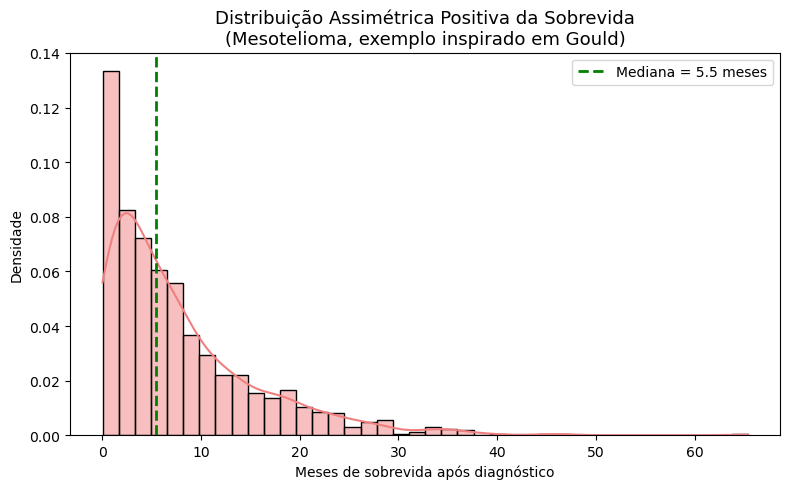

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simular "sobrevida" em meses para um câncer raro, como no texto de Gould
# Usando distribuição exponencial para ter assimetria positiva
np.random.seed(42)
sobrevida = np.random.exponential(scale=8, size=1000)  # mediana próxima de 8 meses

# Calcular mediana
mediana = np.median(sobrevida)

# Plotar histograma com densidade
plt.figure(figsize=(8,5))
sns.histplot(sobrevida, bins=40, kde=True, stat="density", color="lightcoral", edgecolor="black")
plt.axvline(mediana, color="green", linestyle="--", linewidth=2, label=f"Mediana = {mediana:.1f} meses")
plt.title("Distribuição Assimétrica Positiva da Sobrevida\n(Mesotelioma, exemplo inspirado em Gould)", fontsize=13)
plt.xlabel("Meses de sobrevida após diagnóstico")
plt.ylabel("Densidade")
plt.legend()
plt.tight_layout()
plt.show()
